# Support Vector Machine (SVM) Classification

Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. It's particularly well-suited for complex but small or medium-sized datasets. 

SVMs are particularly effective in high-dimensional spaces and are relatively memory efficient. They work well on a variety of classification problems, including image recognition, text categorization, bioinformatics (such as disease classification based on patients' genes), and many other domains.

### Concept of SVM

1. **Maximizing the Margin**:
   SVM aims to find a hyperplane (e.g., a line in two-dimensional space or a plane in three-dimensional space) that best separates the different classes in the feature space. The optimal hyperplane has the maximum margin, i.e., the largest possible distance between it and the nearest data points from each class. These nearest points are called support vectors, which support/define the hyperplane.

2. **Support Vectors**:
   these are the data points belonging to the different classes and are closest to the hyperplane dividing the data. The position of the hyperplane is influenced only by these data points, not by the entire dataset. The decision boundary is entirely characterized by the support vectors, hence the name "Support Vector Machine".

3. **Dealing with Linear and Non-linear Data**:
   - Linear SVM: When the data is linearly separable (i.e., a straight line can separate the classes without error), SVM finds the straight line that maximizes the margin between the two classes.
   - Non-linear SVM: When the data is not linearly separable, SVM uses a kernel trick to map the input features into a higher-dimensional space where a linear separation is possible. Common kernels include the polynomial kernel, radial basis function (RBF) or Gaussian kernel, and sigmoid kernel.

### The Kernel Trick

The kernel trick is a technique that allows SVM to operate in a high-dimensional space without explicitly computing the coordinates of the data in that space, but rather by computing the inner products between the images of all pairs of data in the feature space. This lets SVM efficiently perform a non-linear classification using what is essentially a linear method (dot products in the transformed feature space).

### Mathematical Foundation

Mathematically, SVM solves an optimization problem where the objective is to maximize the margin around the hyperplane. This involves finding a balance between maximizing the margin and minimizing the classification error. The optimization problem can be expressed as:

- Minimize

       1
      --- ||w||^2  
       2
subject to 
    
    yi(w.xi + b) >= 1 
for all "i",

where, "w" is the normal vector to the hyperplane, "b" is the bias term, "xi" are the feature vectors, "yi" are the labels (usually +1 or -1), and ||w||^2 represents the squared norm of "w".

### Limitations of SVM

- **Scalability**: SVMs can be inefficient to train on very large datasets because their training time can be cubic in the size of the dataset.
- **Kernel Choice**: Choosing the appropriate kernel and tuning its parameters can be challenging and heavily influences the performance of the model.
- **Performance**: SVMs do not directly provide probability estimates (these are calculated using an expensive five-fold cross-validation).

Overall, SVMs are a strong starting point for classification problems when the dataset isn’t too large and when high accuracy is not the sole priority. They're particularly useful when the decision boundary is not initially obvious from the data.

# Implementation

This implementation strictly uses a linear kernel (implied by the direct dot product calculations), which means that it does not transform data into a higher-dimensional space. Non-linear separability would require modifications to include a kernel function capable of such transformations. And is simplified to focus on understanding the core mechanics of SVM without delving into more advanced optimizations like those found in libraries such as scikit-learn. We will focus on a simple 2D dataset for clarity.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# This function visualizes the dataset along with the decision boundary and margins defined by the model.
def plot_decision_boundary(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7) # Plotting data points, colored by their class
    ax = plt.gca() # Getting the current axes instance
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creating a grid of values to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = (np.dot(xy, w) + b).reshape(XX.shape)

    # Plotting the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.show()

In [3]:
# Simple SVM implementation using stochastic gradient descent
class SimpleSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_epochs=1000):
        self.learning_rate = learning_rate # The step size for updating weights
        self.lambda_param = lambda_param # Regularization strength
        self.n_epochs = n_epochs # Number of times to iterate through the entire dataset
        self.w = None # Weight vector
        self.b = 0 # Bias term

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features) # Initializing weights to zero

        # Converting labels to -1, 1
        y_ = np.where(y <= 0, -1, 1)

        # Training process
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Updating the weights for correctly classified points
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # Updating the weights for misclassified points
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * (-y_[idx])

    def predict(self, X):
        # Predicting labels for given data
        return np.sign(np.dot(X, self.w) + self.b)

In [7]:
# Function to calculate accuracy of the model
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [9]:
# Generating a  simple linearly separable toy dataset with the help of the "make_blobs" from sklearn library.
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

In [11]:
# Transform labels from 0,1 to -1,1
y = np.where(y == 0, -1, 1)

In [13]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Training the SVM on the training data
svm = SimpleSVM()
svm.fit(X_train, y_train)

In [17]:
# Performing predictions on the test set
y_pred = svm.predict(X_test)

In [19]:
# Calculate and print accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


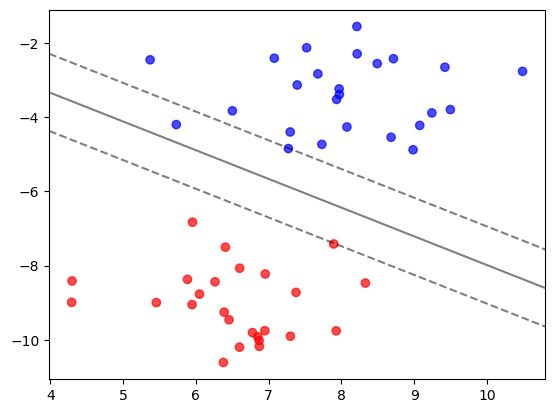

In [21]:
# Plotting the decision boundary on the training set
plot_decision_boundary(X, y, svm.w, svm.b)